In [2]:
#Source https://archive.org/stream/AnneFrankTheDiaryOfAYoungGirl_201606/Anne-Frank-The-Diary-Of-A-Young-Girl_djvu.txt
import re
import nltk
nltk.download('vader_lexicon')
import spacy
import random
import inflect
import datetime
import numpy as np
import pandas as pd
import networkx as nx
from pprint import pprint
from spacy import displacy
from matplotlib import colors
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.pyplot import cm
from itertools import permutations
from scipy.ndimage.filters import gaussian_filter1d
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#How to get pygraphviz
!wget https://anaconda.org/anaconda/pygraphviz/1.3/download/linux-64/pygraphviz-1.3-py36h14c3975_1.tar.bz2
!tar xvjf pygraphviz-1.3-py36h14c3975_1.tar.bz2
!cp -r lib/python3.6/site-packages/* /usr/local/lib/python3.6/dist-packages/

import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout

!python -m spacy download en_core_web_lg
import en_core_web_lg
nlp = en_core_web_lg.load()

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


--2020-01-24 19:23:33--  https://anaconda.org/anaconda/pygraphviz/1.3/download/linux-64/pygraphviz-1.3-py36h14c3975_1.tar.bz2
Resolving anaconda.org (anaconda.org)... 104.17.92.24, 104.17.93.24, 2606:4700::6811:5d18, ...
Connecting to anaconda.org (anaconda.org)|104.17.92.24|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://binstar-cio-packages-prod.s3.amazonaws.com/5a38b7de000a2711f1345719/5cdfc7cea77eb5136dfc8179?response-content-disposition=attachment%3B%20filename%3D%22pygraphviz-1.3-py36h14c3975_1.tar.bz2%22%3B%20filename%2A%3DUTF-8%27%27pygraphviz-1.3-py36h14c3975_1.tar.bz2&response-content-type=application%2Fx-tar&X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Expires=60&X-Amz-Date=20200124T192333Z&X-Amz-SignedHeaders=host&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEMj%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaCXVzLWVhc3QtMSJHMEUCIQCF8HRUiD%2BoEUKdEVmupSiOmz%2BPl4dTXqvGv5WonBgfSAIgHctLfQ1FTzrycoL5XkiDSk55Unc5ZqUtwol9FCcRzGAqtAMIYRAAGgw0NTU4NjQwOTgzNzgiDCEymCGoHI9YDc

In [0]:
downloaded = drive.CreateFile({'id':"1bKPRap5G-ZO2FLrS8WjdpScA6O4tgKAL"}) 
downloaded.GetContentFile('TheDiaryOfAYoungGirl.txt')  

In [5]:
#Regular expressions to look for when a new diary entry is beginning
r = '(?:SUNDAY|MONDAY|TUESDAY|WEDNESDAY|THURSDAY|FRIDAY|SATURDAY), (?:JANUARY|FEBRUARY|MARCH|APRIL|MAY|JUNE|JULY|AUGUST|SEPTEMBER|OCTOBER|NOVEMBER|DECEMBER) \d{1,2}, 19\d{2}\s*\n'
date_indexes = []
#Open the file
with open("TheDiaryOfAYoungGirl.txt", encoding="utf8", errors='ignore') as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        #Make a new diary entry for date
        if re.match(r, line):
            date_indexes.append((line.strip(), i))
    dia = {}
    #Build dictionary of the date indices and their entries
    for i in range(0, len(date_indexes) - 1):
        cur_idx = date_indexes[i][1] + 1
        next_idx = date_indexes[i + 1][1] - 1
        dia.update({date_indexes[i][0]: ''.join(lines[cur_idx:next_idx])})
pprint(dia['FRIDAY, MARCH 17, 1944'])

('\n'
 'My dearest darling, \n'
 '\n'
 'Everything turned out all right after all; Bep just had a sore throat, not '
 'the flu, and \n'
 'Mr. Kugler got a medical certificate to excuse him from the work detail. The '
 'entire \n'
 "Annex breathed a huge sigh of relief. Everything's fine here! Except that "
 'Margot and I \n'
 'are rather tired of our parents. \n'
 '\n'
 '\n'
 '\n'
 "Don't get me wrong. I still love Father as much as ever and Margot loves "
 'both Father \n'
 "and Mother, but when you're as old as we are, you want to make a few "
 'decisions for \n'
 'yourself, get out from under their thumb. Whenever I go upstairs, they ask '
 "what I'm \n"
 '\n'
 "going to do, they won't let me salt my food, Mother asks me every evening "
 'at \n'
 '\n'
 "eight  fifteen if it isn't time for me to change into my nighty, I and they "
 'have to \n'
 '\n'
 "approve every book I read. I must admit, they're not at all strict about "
 'that and let \n'
 '\n'
 'me read nearly everything, but 

In [6]:
i = 0
dd = []
dto_list = []
for key in dia.keys():
    td = key.split(',')
    td = td[1]+td[2]
    td = td.lstrip()
    dto = datetime.datetime.strptime(td, '%B %d %Y')
    dto_list.append(dto)
    if i == 0:
        firstd = dto
        dd.append(0)
    else:
        dd.append((dto-firstd).days)
    i = i + 1
#Consecutive day count from the first entry
print(dd)

[0, 1, 6, 7, 10, 17, 21, 24, 25, 26, 27, 28, 61, 68, 80, 99, 103, 105, 107, 109, 111, 115, 122, 128, 137, 141, 144, 146, 149, 151, 156, 158, 159, 176, 179, 182, 191, 213, 230, 236, 258, 263, 269, 271, 277, 278, 284, 286, 291, 292, 317, 321, 322, 338, 364, 366, 392, 394, 397, 404, 407, 410, 415, 417, 419, 421, 422, 435, 453, 459, 472, 490, 507, 515, 521, 531, 540, 558, 561, 563, 564, 567, 571, 572, 577, 580, 587, 589, 593, 595, 599, 604, 608, 610, 611, 612, 613, 614, 615, 616, 623, 624, 626, 627, 629, 631, 633, 635, 636, 637, 639, 641, 642, 643, 644, 645, 648, 649, 650, 652, 653, 654, 656, 657, 659, 661, 662, 667, 670, 671, 672, 673, 675, 681, 683, 684, 688, 689, 691, 692, 694, 695, 696, 697, 699, 702, 705, 706, 711, 712, 717, 722, 723, 726, 730, 733, 740, 744, 747, 753, 755, 768]


In [7]:
dic = {}
i = 0
#Build a dictionary of the days with their respective text
for key, value in dia.items():
    dic.update({dd[i] : value.replace('\n','')})
    i = i +1
pprint(dic[0])

("I'll begin from the moment I got you, the moment I saw you lying on the "
 'table among my other birthday presents. (I went along when you were bought, '
 "but that doesn't count.) On Friday, June 12, I was awake at six o'clock, "
 "which isn't surprising, since it was my birthday. But I'm not allowed to get "
 'up at that hour, so I had to control my curiosity until quarter to seven. '
 "When I couldn't wait any longer, I went to the dining room, where Moortje "
 '(the cat) welcomed me by rubbing against my legs. A little after seven I '
 'went to Daddy and Mama and then to the living room to open my presents, and '
 'you were the first thing I saw, maybe one of my nicest presents. Then a '
 'bouquet of roses, some peonies and a potted plant. From Daddy and Mama I got '
 'a blue blouse, a game, a bottle of grape juice, which to my mind tastes a '
 'bit like wine (after all, wine is made from grapes), a puzzle, a jar of cold '
 'cream, 2.50 guilders and a gift certificate for two boo

In [8]:
p = inflect.engine()
d_tags = {}

#Remove these parts of existing entities, e.g. Dearest Kitty vs. Kitty
def clean_up(X,ex_ls):
    clean_l = ['Dearest','Dear','kittle','\'s','\\','The','the','didn\'t','hasn\'t','doesn\'t','every','8,1943','gize,'
               ,'MAY 7,1944','wheeled','My','wasn\'t','COMMENT','14g','I\'m','couldn\'t','Great','Old','future','looked'
               ,'willi','de\'','d\'']
    for clean in clean_l:
        if (clean in X) and (X not in ex_ls):
            X = X.replace(clean,'')
            X = X.lstrip()
            X = X.rstrip()
    if p.singular_noun(X) and (X not in ex_ls):
        X = p.singular_noun(X)
    return X

#Reg expressions to detect nlp entities and reclassify them to standardize
def standardize(X,ex_ls):
    #Things I'd like to standardize to aggregate better
    rep = {'^anne':'Anne','^van d':'van D.','home guard':'Home Guard','^gies &':'Gies & Co.'
           ,'secret annex':'Annex','^bep':'Bep','^miep':'Miep','^margot':'Margot'
          ,'^peter':'Peter','hanneli':'Hanneli','hiller':'Hitler','^g.z. e. s.':'G.Z.',
          '^olga meyen- dorff' : 'Olga Meyen-dorff','^ursul':'Ursula','kitty':'Kitty','das schon':'das schon'}
    for key,value in rep.items():
        if (re.match(key,X.replace('"','').lower())) and (X not in ex_ls):
            X = rep[key]
    return X

#Make entity tags of nlp for each diary or, later, sentence entry
def make_entities(dic,keep_l):
    for key, value in dic.items():
        arr = []
        doc = nlp(value.replace('\n',''))
        #Keep these types of nlp entities
        #Typo/model error + german corrections
        drop_t = ['it','you\'re','he','his','her','ei ght','bd\'"dl','she','i\'m','there','who','wasn\'t','didn\'t','that','here','we\'ll'
              ,'let','what','i','son','he\'ll','re','wouldn\'t','y\'d','ridicu lou','lady','one','fed','i\'d','\'oh','you\'d'
              ,'s','shh','tranquthty','civthzed','now fifteen','hadn\'t','sun','\'i','she\'ll','man','my hand','saw'
              ,'\'remem ber','re\'re','you\'ve','you\'ll','shuffiing','he\'d','bye','nitely','much tidier','semidarknes'
              ,'you','te','mean-','conceited','my head','we\'d','i\'d lain','you\'ve','mothproofed'
              ,'\'that','famthar','noth','mothjr','m r','clodiesline','diat','togedier','algebra','fadier','entsetzlich'
              ,'nie zu ersetzen','nothina','\'that','beina','future','secredy','hand','writina','dealina','enouah','runnina'
              ,'unfortu','house','jun','\'he','brrr','i. boy','mally','dread','pst','chin','phy','iii','head'
              ,'cinema ater','sore throat','ketde','baker','seething','silent','tired','sister','lady','balli'
              ,'ding-dong','sohn','ron','mor','himmelhoch jauchzend','zu tode','der mann','jan gy','das liebe','das schone'
              ,'urn gotte','keg','eastern','du spritzt schon','quicksilver','espe','brea','miep, bep','gy','du bist doch eine'
              ,'ich mach\'','ruddy','kitty, bep','ifhe','pedes apostolorum','das schon','1','everYthing']

        #Things inflect library handles poorly or to exclude from touching
        ex_ls = ['Swiss','William Louis','Theseus','Zeus','Oedipus','Peleus','Orpheus','Hercules','Oasis','Maria Theresa','Myron'
                ,'Phidias','Annex','Trees','Broks','Dutch Sasas','Kuperus']

        for X in doc.ents:
            s1 = X.text
            if (X.label_ in keep_l):
                s1 = clean_up(s1,ex_ls)
                s1 = standardize(s1,ex_ls)
                if (s1.lower() not in drop_t) and (s1):
                    arr.append((s1, X.label_))
        d_tags[key] = arr
    return d_tags

keep_l = ['PERSON','NORP','PRODUCT','ORG']
d_tags = make_entities(dic,keep_l)
pprint(d_tags[0])

[('Moortje', 'PERSON'),
 ('Margot', 'PERSON'),
 ('Hanneli', 'PERSON'),
 ('Sanne Federmann', 'PERSON'),
 ('Ilse Wagner', 'PERSON'),
 ('Hanneli', 'PERSON'),
 ('Jacqueline van Maarsen', 'PERSON'),
 ('Sanne', 'PERSON'),
 ('Hanne', 'PERSON'),
 ('Sanne', 'PERSON'),
 ('Jacqueline van Maarsen', 'PERSON'),
 ('Jewish', 'NORP'),
 ('Ilse', 'PERSON'),
 ('Hanneli', 'PERSON'),
 ('Sanne', 'PERSON'),
 ('Dutch', 'NORP'),
 ('Volume I. Aunt Helene', 'PERSON'),
 ('Aunt Stephanie', 'PERSON'),
 ('Aunt Deny', 'PERSON'),
 ('Daisy Go', 'PERSON'),
 ('Rin Tin Tin', 'PERSON'),
 ('Rin Tin Tin', 'PERSON')]


In [0]:
chars = []
full_tags = []
tag_count_dic = {}
j = 0
for key, value in d_tags.items():
    i = 0
    tags = []
    tag_count_dic[dto_list[j]] = {}
    for elem in value:
        full_tags.append(value[i])
        chars.append(value[i][0])
        tags.append(value[i][1])
        i += 1
    for tag in set(tags):
        tag_count_dic[dto_list[j]][tag] = tags.count(tag)
    j += 1

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


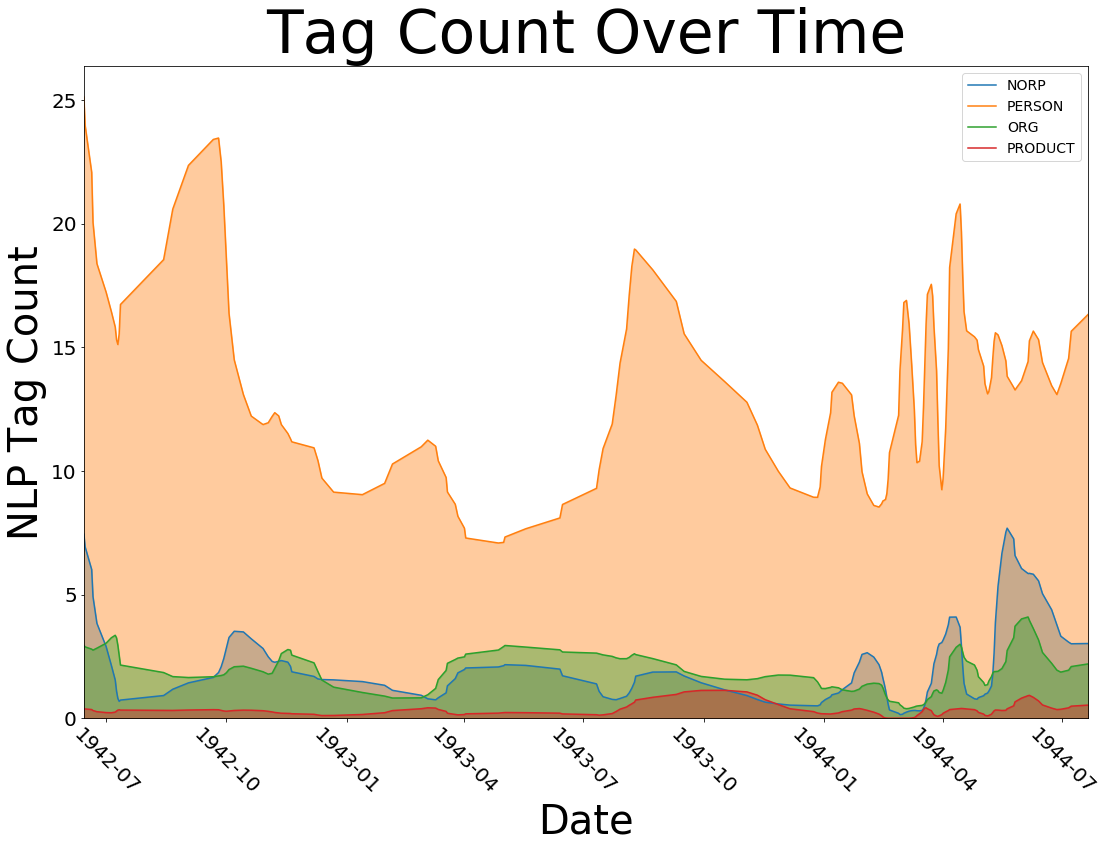

In [10]:
dft = pd.DataFrame(tag_count_dic)
dft = dft.fillna(0).transpose()
plt.subplots(figsize=(18,12))
columns = list(dft)
i = 0
cmap = cm.get_cmap('tab10')
for column in columns:
    y = gaussian_filter1d(dft[column],sigma=2.5)
    x = list(tag_count_dic.keys())
    plt.fill_between(x,y, color=cmap.colors[i], alpha=0.4)
    plt.plot(x,y,color=cmap.colors[i],label=column)
    i += 1

plt.xlabel('Date',size=40)
plt.ylabel('NLP Tag Count',size=40)
plt.title('Tag Count Over Time',size=60)
plt.ylim(ymin=0)
plt.xlim(xmax=max(x),xmin=min(x))
plt.legend(loc='upper right',prop={'size':14})
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='x', which='major',rotation=-45)
#plt.setp(plt.xaxis.get_majorticklabels(), rotation=-45 ) 
#lines = dft.plot.line(figsize=(18,12))

In [11]:
unique_chars = list(set(chars))
unique_full_tags = list(set(full_tags))
print(sorted(unique_chars))

['"Ich mach\' das schon', 'Aagje', 'Adam', 'Agnes Kingworth', 'Albert de Mesquita', 'Alfred Dussel', 'Alice Stern', 'Allie', 'Allied', 'Almelo', 'American', 'Amsterdammer', 'Anne', 'Annex', 'Anton Rubinstein', 'Apollo', 'Appie Riem', 'Appy', 'Arnold', 'Attitude of  Annex Residents Toward  War', 'Aunt Deny', 'Aunt Stephanie', 'Austrian', 'BBC', 'Bahia', 'Bayeux', 'Beaverbrook', 'Beethoven', 'Beethovenstraat', 'Benjamin', 'Bep', 'Bernd', 'Bernhard', 'Bertu', 'Betty Bloemendaal', 'Beverwijk', 'Bia', 'Big Dipper', 'Bijenkorf', 'Black Peter', 'Bobruysk', 'Boche', 'Bolkestein', 'Bolshevik', 'Bookstore', 'Brain', 'Bram', 'Bread', 'British', 'British Air Force', 'Broks', 'Brrring', 'Bulgarian', 'Buralary', 'C.', 'C.N.', 'Cabinet', 'Cady', 'Caen', 'Calai', 'Canadian', 'Carlton Hotel', 'Cassino', 'Charles V', 'Charles V. n', 'Charles XII', 'Charlie Chaplin', 'Chatterback', 'Chatterbox', 'Cherbourg', 'Cherubini', 'Christian', 'Churchill', 'Circassian', 'Cissy van Marxveldt', 'Clara Wieck', 'Comfo

In [12]:
tag_dic = {}
for tag in full_tags:
    if tag[0] not in tag_dic.keys():
        tag_dic[tag[0]] = [tag[1]]
    else:
        tag_dic[tag[0]].append(tag[1])
        
common_tag_dic = {}
for key in tag_dic.keys():
    common_tag_dic[key] =  max(set(tag_dic[key]), key = tag_dic[key].count) 

common_tag_dic

{'"Ich mach\' das schon': 'PERSON',
 'Aagje': 'PERSON',
 'Adam': 'PERSON',
 'Agnes Kingworth': 'PERSON',
 'Albert de Mesquita': 'PERSON',
 'Alfred Dussel': 'PERSON',
 'Alice Stern': 'PERSON',
 'Allie': 'ORG',
 'Allied': 'ORG',
 'Almelo': 'ORG',
 'American': 'NORP',
 'Amsterdammer': 'PERSON',
 'Anne': 'PERSON',
 'Annex': 'PRODUCT',
 'Anton Rubinstein': 'PERSON',
 'Apollo': 'ORG',
 'Appie Riem': 'PERSON',
 'Appy': 'PERSON',
 'Arnold': 'PERSON',
 'Attitude of  Annex Residents Toward  War': 'ORG',
 'Aunt Deny': 'PERSON',
 'Aunt Stephanie': 'PERSON',
 'Austrian': 'NORP',
 'BBC': 'ORG',
 'Bahia': 'PRODUCT',
 'Bayeux': 'ORG',
 'Beaverbrook': 'PERSON',
 'Beethoven': 'PERSON',
 'Beethovenstraat': 'ORG',
 'Benjamin': 'PERSON',
 'Bep': 'PERSON',
 'Bernd': 'PERSON',
 'Bernhard': 'PERSON',
 'Bertu': 'ORG',
 'Betty Bloemendaal': 'PERSON',
 'Beverwijk': 'PERSON',
 'Bia': 'PERSON',
 'Big Dipper': 'ORG',
 'Bijenkorf': 'PERSON',
 'Black Peter': 'PERSON',
 'Bobruysk': 'PERSON',
 'Boche': 'PERSON',
 'Bolk

In [0]:
df = pd.DataFrame(columns = unique_chars, index = unique_chars)
df[:] = int(0)

for key,value in d_tags.items():
    arr = []
    for elem in d_tags[key]:
        arr.append(elem[0])
    arr.append(elem[0])
    for char1 in unique_chars:
        for char2 in unique_chars:
            if char1 in arr and char2 in arr:
                df[char1][char2] += 1
                df[char2][char1] += 1

In [0]:
def make_edges(df):
    #Find edge values to determine max
    edge_values = []
    edge_list = {}
    for index, row in df.iterrows():
        i = 0
        for col in row:
            if col > 0 and (index != row.index[i]):
                edge_values.append(col)
            i += 1
    
    #Get max edge weight as percentage of that max edge value
    for index, row in df.iterrows():
        i = 0
        for col in row:
            #Remove edges with no weight, self-referential edges, and edges already added with inverse keys
            if col > 0 and (index != row.index[i]) and ((df.columns[i], index) not in list(edge_list.keys())):
                weight = float(col)/max(edge_values)
                edge_list[(index, df.columns[i])] = weight
            i += 1
    return edge_list

def make_nodes(df):
    #Get node values to determine max
    node_values = []
    node_list = {}
    for index, row in df.iterrows():
        i = 0
        for col in row:
       #     #Collect nodes with weight
            if col > 0 and (index == row.index[i]):
                node_values.append(col)
            i += 1
    
    #Get max node weight as percentage of that max node value
    for index, row in df.iterrows():
        i = 0
        for col in row:
            if col > 0 and (index == row.index[i]):
                weight = float(col)/max(node_values)
                node_list[(index)] = weight
            i += 1
    return node_list

In [0]:
def make_edge_list(df):
    edges = []
    edge_list = make_edges(df)
    for edge in sorted(edge_list):
        edges.append((edge[0],edge[1],edge_list[edge]))
    return edges

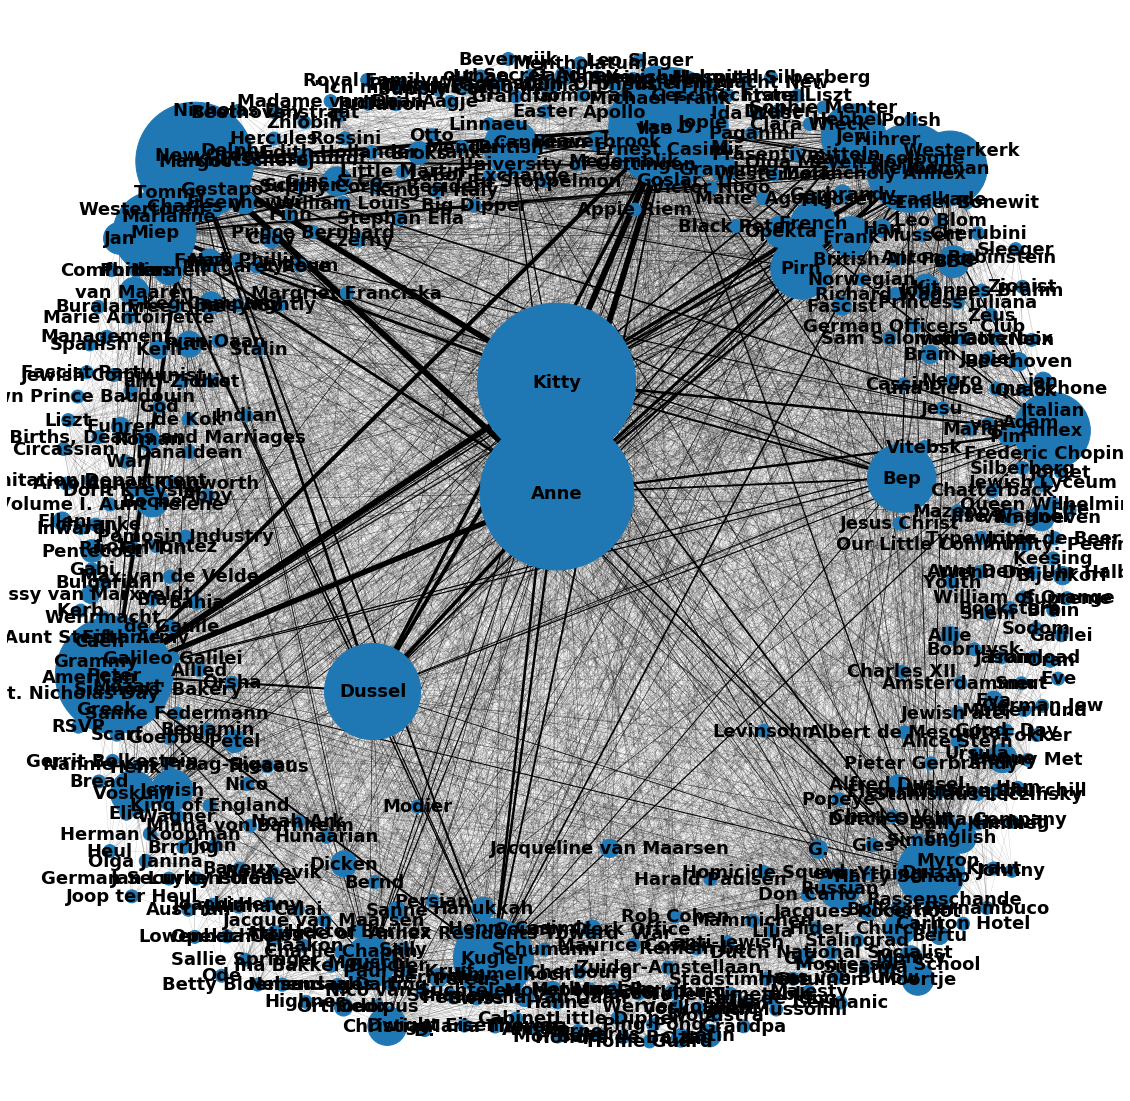

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

plt.subplots(figsize=(20,20))

edge_list = make_edges(df)
edges = make_edge_list(df)
node_list = make_nodes(df)

G = nx.Graph()
G.add_nodes_from(sorted(node_list))
G.add_weighted_edges_from(edges)
    
node_scalar = 25000
edge_scalar = 10
sizes = [node_list[x]*node_scalar for x in sorted(node_list)]
widths = []
for edge in nx.edges(G):
    if edge in edge_list.keys():
        widths.append(edge_list[edge]*edge_scalar)
    else:
        widths.append(edge_list[(edge[1],edge[0])]*edge_scalar)

#draw the graph
pos = nx.spring_layout(G, k=0.42, iterations=17)

nx.draw(G, pos, with_labels=True, font_size = 18, font_weight = 'bold',node_size=sizes,width=widths)

#plt.axis('off')
#plt.savefig("imgs/sl_network2.png") # save as png

In [0]:
def top_n(dic,n,s):
    l = sorted(dic.items(), key = lambda kv:(kv[1], kv[0]))
    l = list(l[-n:])
    d = dict(l)
    df = pd.DataFrame.from_dict(d,orient='index',columns=[s])
    return round(df,4)

In [18]:
degree_centrality = nx.degree_centrality(G)
deg = top_n(degree_centrality,10,'Degree Centrality')
print(deg)

        Degree Centrality
Dussel             0.3396
Annex              0.3560
Dutch              0.3724
Jew                0.3934
German             0.4239
Peter              0.5269
Margot             0.5738
van D.             0.5972
Kitty              0.9438
Anne               0.9508


In [19]:
eigenvector_centrality = nx.eigenvector_centrality(G)
eig = top_n(eigenvector_centrality,10,'Eigenvalue Centrality')
print(eig)

        Eigenvalue Centrality
Annex                  0.1262
Hitler                 0.1369
Bep                    0.1392
Jew                    0.1510
German                 0.1578
Peter                  0.1581
van D.                 0.1662
Margot                 0.1879
Kitty                  0.2473
Anne                   0.2509


In [20]:
closeness_centrality = nx.closeness_centrality(G)
close = top_n(closeness_centrality,10,'Closeness Centrality')
print(close)

        Closeness Centrality
Dussel                0.6023
Annex                 0.6083
Dutch                 0.6144
Jew                   0.6224
German                0.6345
Peter                 0.6789
Margot                0.7011
van D.                0.7129
Kitty                 0.9468
Anne                  0.9531


In [21]:
eig_deg = pd.DataFrame.join(eig, deg, on=None, how='outer', lsuffix='', rsuffix='', sort=False)
print(eig_deg)

        Eigenvalue Centrality  Degree Centrality
Anne                   0.2509             0.9508
Annex                  0.1262             0.3560
Bep                    0.1392                NaN
Dussel                    NaN             0.3396
Dutch                     NaN             0.3724
German                 0.1578             0.4239
Hitler                 0.1369                NaN
Jew                    0.1510             0.3934
Kitty                  0.2473             0.9438
Margot                 0.1879             0.5738
Peter                  0.1581             0.5269
van D.                 0.1662             0.5972


In [22]:
cent = pd.DataFrame.join(eig_deg, close, on=None, how='outer', lsuffix='', rsuffix='', sort=False)
print(cent)

        Eigenvalue Centrality  Degree Centrality  Closeness Centrality
Anne                   0.2509             0.9508                0.9531
Annex                  0.1262             0.3560                0.6083
Bep                    0.1392                NaN                   NaN
Dussel                    NaN             0.3396                0.6023
Dutch                     NaN             0.3724                0.6144
German                 0.1578             0.4239                0.6345
Hitler                 0.1369                NaN                   NaN
Jew                    0.1510             0.3934                0.6224
Kitty                  0.2473             0.9438                0.9468
Margot                 0.1879             0.5738                0.7011
Peter                  0.1581             0.5269                0.6789
van D.                 0.1662             0.5972                0.7129


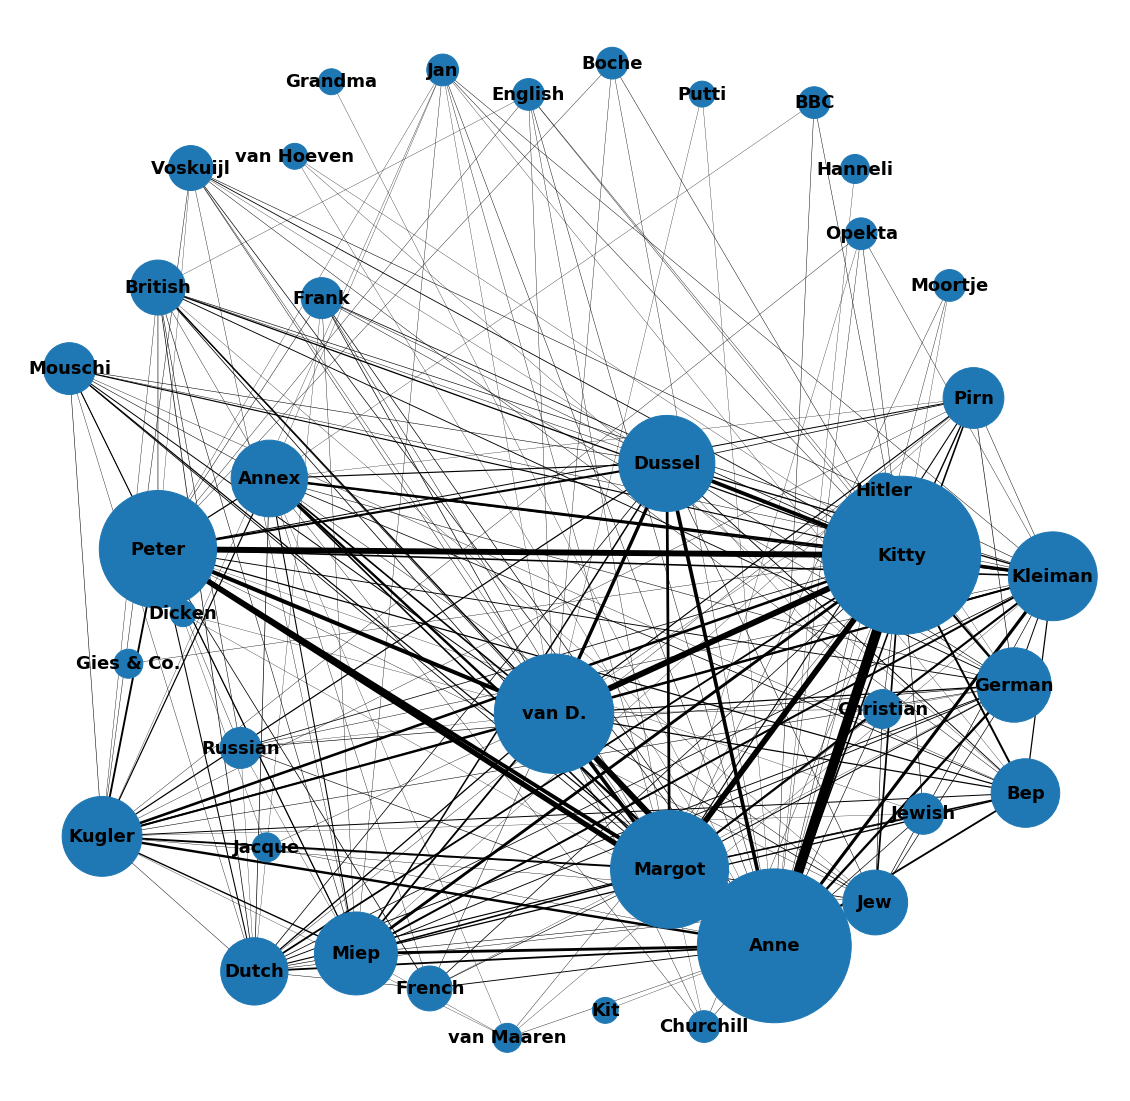

In [23]:
plt.subplots(figsize=(20,20))

filter = 8

#Filter off single occurrences
df2 = df.copy()
df2[df2 < filter] = 0

edge_list = make_edges(df2)
edges = make_edge_list(df2)
node_list = make_nodes(df2)

G = nx.Graph()
G.add_nodes_from(sorted(node_list))
G.add_weighted_edges_from(edges)
    
node_scalar = 25000
edge_scalar = 10
sizes = [node_list[x]*node_scalar for x in sorted(node_list)]
widths = []
for edge in nx.edges(G):
    if edge in edge_list.keys():
        widths.append(edge_list[edge]*edge_scalar)
    else:
        widths.append(edge_list[(edge[1],edge[0])]*edge_scalar)

#draw the graph
pos = nx.spring_layout(G, k=0.8, iterations=17)

nx.draw(G, pos, with_labels=True, font_size = 18, font_weight = 'bold',node_size=sizes,width=widths)

#plt.axis('off')
#plt.savefig("imgs/sl_network2.png") # save as png

In [24]:
full_txt = ''
sentences = []
for val in dia.values():
    full_txt += val.replace('\n','')
full_txt

'I\'ll begin from the moment I got you, the moment I saw you lying on the table among my other birthday presents. (I went along when you were bought, but that doesn\'t count.) On Friday, June 12, I was awake at six o\'clock, which isn\'t surprising, since it was my birthday. But I\'m not allowed to get up at that hour, so I had to control my curiosity until quarter to seven. When I couldn\'t wait any longer, I went to the dining room, where Moortje (the cat) welcomed me by rubbing against my legs. A little after seven I went to Daddy and Mama and then to the living room to open my presents, and you were the first thing I saw, maybe one of my nicest presents. Then a bouquet of roses, some peonies and a potted plant. From Daddy and Mama I got a blue blouse, a game, a bottle of grape juice, which to my mind tastes a bit like wine (after all, wine is made from grapes), a puzzle, a jar of cold cream, 2.50 guilders and a gift certificate for two books. I got another book as well, Camera Obsc

In [0]:
def make_sentences(full_txt):
    doc = nlp(full_txt)
    sent_list = []
    for i, token in enumerate(doc.sents):
        for entity in unique_chars:
            if entity in token.text:
                sent_list.append(token.text)
                break
    return sent_list

In [29]:
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
sentiments = []
sent_list = make_sentences(full_txt)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [30]:
i = 0
sent_dic = {}
while i < len(sent_list):
    sent_dic[i] = sent_list[i]
    i += 1
sent_tags = make_entities(sent_dic,keep_l)
sent_tags[0]

[('Moortje', 'PERSON')]

In [31]:
for key in sent_tags.keys():
    sentiment = sid.polarity_scores(sent_list[key])
    ent_list = []
    for tag in sent_tags[key]:
        ent_list.append(tag[0])
    sentiments.append((ent_list,sentiment))
sentiments[0:5]

[(['Moortje'], {'compound': 0.34, 'neg': 0.0, 'neu': 0.893, 'pos': 0.107}),
 (['Margot'], {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}),
 (['Sanne'], {'compound': 0.8074, 'neg': 0.0, 'neu': 0.523, 'pos': 0.477}),
 (['Anne', 'Hanne', 'Sanne'],
  {'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}),
 (['Dutch', 'Volume I. Aunt Helene'],
  {'compound': -0.1655, 'neg': 0.101, 'neu': 0.818, 'pos': 0.08})]

In [32]:
sentiments2 = []
for element in sentiments:
    ent_comb = list(permutations(element[0],2))
    for ent_tup in ent_comb:
        if (element[1]['compound'] != 0):
            if ent_tup in G.edges:
                sentiments2.append((ent_tup,element[1]['compound']))
            elif (ent_tup[1],ent_tup[0]) in G.edges:
                sentiments2.append((ent_tup,element[1]['compound']))
sentiments2[0:5]

[(('Dutch', 'Jew'), -0.3054),
 (('Jew', 'Dutch'), -0.3054),
 (('German', 'Jew'), -0.4404),
 (('Jew', 'German'), -0.4404),
 (('Miep', 'Dussel'), 0.5423)]

In [0]:
#Build dictionary of sentiments observed per edge
sent_dic = {}
for element in sentiments2:
    if element[0] not in sent_dic:
        sent_dic[element[0]] = [element[1]]
    else:
        sent_dic[element[0]].append(element[1])

In [0]:
pos_dic, neg_dic, neut_dic = {}, {}, {}
for element in sent_dic:
    sentiment = round(np.mean(sent_dic[element]),1)
    if sentiment != 0:
        if sentiment > 0:
            pos_dic[element] = sentiment
        else:
            neg_dic[element] = sentiment

In [0]:
def make_clusters_async(G,clusters=5):
    from networkx.algorithms import community
    import itertools
    communities = list(nx.community.asyn_fluidc(G, clusters))
    i = 0
    node = {}
    cmap = cm.get_cmap('Set3')
    node_colors = []
    for entity in sorted(G.nodes):
        for n, com in enumerate(list(communities)):
            if entity in com:
                color = colors.to_hex(cmap.colors[n])
        node_colors.append(color)
    return node_colors

In [0]:
node_colors = make_clusters_async(G,7)
i = 0
test_nodes = ['English','German','British','Russian','French','Dutch']
color_dic = {}
while i < len(G.nodes):
    color_dic[list(G.nodes)[i]] = node_colors[i]
    i += 1
max_color = {}
for tnode in test_nodes:
    count = 0
    for tnode2 in test_nodes:
        if tnode != tnode2:
            if color_dic[tnode] == color_dic[tnode2]:
                count += 1
        max_color[tnode] = count

In [54]:
max(max_color.values())

5

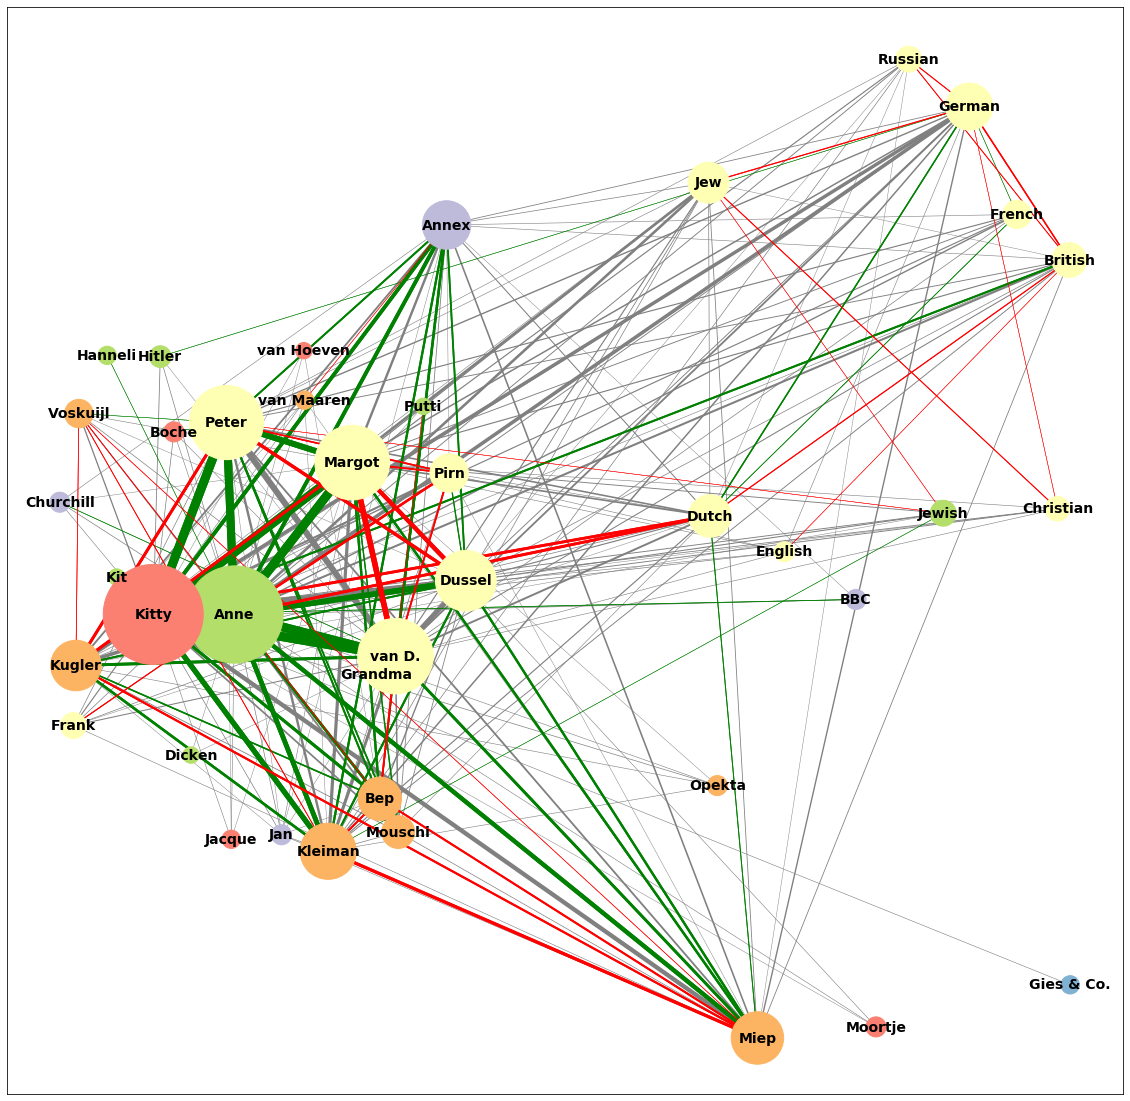

In [64]:
plt.figure(figsize=(20,20))

k = 0.8
edge_scalar = 15
node_scalar = 0.4

sizes2 = []
for size in sizes:
  sizes2.append(size*node_scalar)

#draw the graph
pos = nx.spring_layout(G, k, iterations=17)
#nx.set_node_attributes(G, common_tag_dic, 'layer')

i = 0
coord = [(-2,0),(1,1),(-2,1.5),(1,-1)]
for tag in keep_l:
    for key in node_list.keys():
        if common_tag_dic[key] == tag:
            pos[key] = [pos[key][0]+coord[i][0],pos[key][1]+coord[i][1]]
    i += 1

#Neutral sentiment
for edge in G.edges:
    if (edge not in pos_dic) and (edge not in neg_dic):
        weight = G.get_edge_data(edge[0], edge[1])['weight']*edge_scalar
        nx.draw_networkx_edges(G, pos,edgelist=[edge],width=weight, alpha=1, edge_color='grey')

#Positive sentiment
for positive in pos_dic:
    weight = G.get_edge_data(positive[0], positive[1])['weight']*edge_scalar
    nx.draw_networkx_edges(G, pos,edgelist=[positive],width=weight, alpha=1, edge_color='g')

#Negative sentiment
for negative in neg_dic:
    weight = G.get_edge_data(negative[0], negative[1])['weight']*edge_scalar
    nx.draw_networkx_edges(G, pos,edgelist=[negative],width=weight, alpha=1, edge_color='r')
        
nx.draw_networkx_nodes(G, pos, with_labels=True, font_size = 18, font_weight = 'bold', 
        node_size = sizes2, node_color = node_colors, width = widths)

#offset = -0.00003
#pos_labels = {}
#i = 0
#for key in list(pos.keys()):
#    x, y = pos[key]
#    pos_labels[key] = (x, y+offset*sizes[i]*np.log(max(sizes)/(min(sizes))))
#    i = i + 1

labels = nx.draw_networkx_labels(G, pos,font_size=14, font_color='k', font_family='sans-serif', font_weight='bold',label_pos=3)

In [35]:
tags_that_exist = []
for node in G.nodes:
  if node in common_tag_dic.keys():
    tags_that_exist.append(common_tag_dic[node])
  if common_tag_dic[node] == 'PRODUCT':
    print(node)
tags_that_exist = set(tags_that_exist)
tags_that_exist

Annex


{'NORP', 'ORG', 'PERSON', 'PRODUCT'}